In [5]:
import cv2
import numpy as np
import os
import pytesseract
import re
image_frames = 'image_frames/'
pytesseract.pytesseract.tesseract_cmd = r'D:\Tesseract-OCR\tesseract.exe'
from PIL import Image
import time

In [5]:
import cv2
import time

st = time.time()

# Open the video file
video_file = 'meeting sample.mp4'  # Replace with the path to your video file
cap = cv2.VideoCapture(video_file)

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(frame_rate)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        # Grayscale conversion
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Thresholding
#         _, thresh_frame = cv2.threshold(gray_frame, 128, 255, cv2.THRESH_BINARY)

        # Noise reduction
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#         opened_frame = cv2.morphologyEx(thresh_frame, cv2.MORPH_OPEN, kernel, iterations=2)

        # Sharpening
        sharpened_frame = cv2.filter2D(gray_frame, -1, kernel)

        # Save the processed frame as an image
        frame_filename = f'./image_frames/{int(frame_count / frame_rate)}.png'
        cv2.imwrite(frame_filename, sharpened_frame)

    frame_count += 1

et = time.time()
print(et - st)

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


5.138622999191284


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [7]:
import cv2
st = time.time()
# Open the video file
video_file = 'meeting sample.mp4'  # Replace with the path to your video file
cap = cv2.VideoCapture(video_file)

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

    
frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate (frames per second)
frame_interval = int(frame_rate)

# frame_rate = cap.get(5)  # Get the frame rate (frames per second)
print(frame_rate)
# frame_interval = int(1 / frame_rate)
print(frame_interval)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        # Save the frame as an image
        frame_filename = './image_frames/'+str(int(frame_count / frame_rate)) +'.png'
        cv2.imwrite(frame_filename, frame)

    frame_count += 1
et = time.time()
print(et-st)
# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


16.0
16
7.369235992431641


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [9]:
img = cv2.imread('sample_image_cmd4.JPG')

In [10]:
def ocr_core(img):
    text = pytesseract.image_to_string(img)
    print(text)
    return text

def get_grayscale(image):
    if len(image.shape) == 2 or image.shape[2] == 1:
        return image
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image, 5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [11]:
st = time.time()
ocr_core(img)
et = time.time()
print(et-st)

Microsoft Windows [Version 10.0.19645.3570]
(c) Microsoft Corporation. All rights reserved.

Users\10710548>pip install pytesseract




[notice] A new release of pip is available
[notice] To update, run: python.exe

23.0 -

Users\10710548>
Users\10710548>echa “maninder”

‘echa’ is not recognized as an internal or external command
operable program or batch file.

C:\Users\1071@548>echo “maninder”
maninder™

c: \Users\10710548>ipconfig

Windows IP Configuration

Ethernet adapter Ethernet 4:

Media State .

eee Media disconnected
Connection-specific DNS Suffix

domain.name

Wireless LAN adapter Local Area Connection* 6:

Media State... ....... . : Media disconnected
Connection-specific DNS Suffix

Wireless LAN adapter Local Area Connection* 10:

Media State... ....... . : Media disconnected
Connection-specific DNS Suffix

Wireless LAN adapter Wi-Fi:

domain.name
2401 :4900: 1cb8:4c19: 68b3:6629:2279:d9ab
1 24@1:4900:1cb8:4c19:4c91:544a:684b:5927
cock
192.168.1.5

Connection-specific DNS S

In [9]:
# img = get_grayscale(img)
# img = thresholding(img)
# img = remove_noise(img)

# print(ocr_core(img))

# def longest_common_subsequence(X, Y):
#     m, n = len(X), len(Y)
#     dp = [[0] * (n + 1) for _ in range(m + 1)]

#     for i in range(1, m + 1):
#         for j in range(1, n + 1):
#             if X[i - 1] == Y[j - 1]:
#                 dp[i][j] = dp[i - 1][j - 1] + 1
#             else:
#                 dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

#     i, j = m, n
#     lcs = []
#     while i > 0 and j > 0:
#         if X[i - 1] == Y[j - 1]:
#             lcs.append(X[i - 1])
#             i -= 1
#             j -= 1
#         elif dp[i - 1][j] > dp[i][j - 1]:
#             i -= 1
#         else:
#             j -= 1

#     return " ".join(reversed(lcs))


# # main_sentence = """ """
# # other_sentence = """You Dat Unc Atte Unc Mir Lar Nat Unt ash ccr < > C 0 amazon in/s?k=rain+water&crid= ZPROALJK3C2O9&sprefix=rain+water"2Caps%2C258&ref-nb_sb_noss Relaunch to updlate Favorites Fowdo steppern_ Raspperry Pi Tutori_ DealeXtreme Cccl; https;/www,course Water Leve Control Projects Working principle Simple Prcximity Se_ Welcomel Welcom  Career Ropotics AIl Bookmarks amazon Deliver to Annu rain water Hello, Maninder Retums Subtotal Sirsa 125055 EN Account & Lists & Orders Cart 7549.00 prime Cart =Al Car & Motorbike Amazon miniTV Sell Baby Health; Household & Personal Care Gift Cards Pet Supplies Subscribe & Save Browsing History Customer Service at Indian Festival SHOP NOW Finale days polDf BOLDRT ZEXEL Snuggling Cloud Rain NeeRain SS 304 Rooftop Rainwater Rainy FL 500 Self-Cleaning Dual RainGain Rainwater Harvesting Filter SPIRY FI ENGINEERS Aqua 5 Micron {549.00 Diffuser; Snuggle Cloud; Raindrop Harvesting Filter; Pack of Intensity Rainwater Harvesting Filter (Stainless Steel Filter Mesh; 75 mm) Dia & 20" Length Bag Bore Water prime Humidifier; Mushroom Waterfall Suitable for Area 5400 Square Filter Lamp, Anxiety and Stress Relief; Feet; Black Installation Kit Great Indian Festival 463 '6,500 300+ bought in month Save extra with No Cost EMI {3,250MRP:43958 (18% off) '2,099 MRP: 42,999 (30%/ off) prime FREE Delivery by Saturday; 11 '26,500 Save extra with No Cost EMI '280MRP: #599 (53% off) Save <35 with coupon November Save extra with No Cost EMI Save 5% with coupon FREE Delivery by Monday, 13 November prime FREE Delivery by Saturday, 11 FREE Delivery by Monday; 13 November for (prime FREE Delivery by Sunday, 12 Prime members November for Prime members November Rain Water Collection By Blake Holliday K FITG18 Mens Raincoat with Hood Rain Cloud Humidifier Water Drip, 2 Rain Water Collection (Foxhole KOHLER Rain Shower Round 203mm UJEAVETTE@ Rain Cloud Humidifier Water Fighter-Rain Coat for Men Humidifier with Essential Oil Homestead Book 11) (Rain Duet); with Katalyst Air- Water Drip Colors Night Light Waterproof Pant and Carrying Diffuser;45Oml Cloud Humidifier by Blake Holliday induction Spray Technology Mushroom Lamp Diffuser Grain Pouch; Navy Blue Rain Drop, Mushroom Humidifier_ (Polished Chrome) Green Kindle Edition *8,099 MRP: 213498 (39% off) {415MRP: =699 (41% otf) 11,124 *0 kindle unlimited Great Indian Festival Save extra with No Cost EMI Free with Kindle Unlimited membership prime Save extra with No Cost EMI "6,450MRP: #8-688 (25% off) Get it Tuesday, 21 November Friday, 24 Learn More https:/ /www amazon in/events greatindianfestivaV&ref_=ine_gw_j23_03_swm/?_encoding-UTF8Rref_=nav_swm_SK= Fridav 24 Movember - Tuesdav 28 ith Ao Cost FM November 10.40 06-11-2023 New? Upto Past Geip"""

# # lcs = longest_common_subsequence(main_sentence.split(), other_sentence.split())
# # unique_content = " ".join(word for word in other_sentence.split() if word not in lcs)

# # print("Longest Common Subsequence:", lcs)
# # print("Unique content:", unique_content)

In [10]:
temp_list = os.listdir(image_frames)

temp_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
temp_list = [file for file in temp_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

In [11]:
# current_frame = 0
# final_string = ''
# for image in temp_list[:10]:

#     if len(final_string) == 9999999:
#         final_string = ''
#     image_path = os.path.join(image_frames,image)
#     print(image_path)
#     result = pytesseract.image_to_string(Image.open(image_path))
# #     result = reader.readtext(image_path)
# #     result = np.take(np.array(result), indices=[1], axis=1)
# #     result =  '\n'.join(item[0] for item in result)
#     print(result)
#     lcs = longest_common_subsequence(final_string.split(), result.split())
#     unique_content = " ".join(word for word in result.split() if word not in lcs)
# #     print(unique_content)
#     unique_content = unique_content.lower()
# #     unique_content = remove_non_text(unique_content, keep_symbols=symbols_to_keep)
# #     unique_content = correct_ocr_errors(unique_content)

# #     print(unique_content,end='\n')
#     if unique_content in final_string:
#         continue
#     else:
#         final_string = final_string + ' '+ unique_content
#         with open('test_storage.txt','a',encoding='utf8') as f:
#             f.write(unique_content+'\n')
    
# #     print(result)
#     print('-_'*30)

In [12]:
current_frame = 0
final_string = ''
image_path ='sample_image_cmd4.JPG'
def break_tesseract_output_into_lines(tesseract_output):
    lines = tesseract_output.split('\n')
    cleaned_lines = [line.strip() for line in lines if line.strip()]
    return cleaned_lines

for image in temp_list:

#     if len(final_string) == 9999999:
#         final_string = ''
    image_path = os.path.join(image_frames,image)
    print(image_path)
    img = cv2.imread(image_path)
    img = get_grayscale(img)
    img = thresholding(img)
    img = remove_noise(img)
    result = pytesseract.image_to_string(Image.open(image_path))


    # Use regular expression to find the command
    text_lines = break_tesseract_output_into_lines(result)

    for x in text_lines:
        command_match = re.search(r'>\s*([^\n]+)', x)

        if command_match:
            command = command_match.group(1)
            print("Command entered:", command)
        else:
            print("No command found.")


image_frames/0.png
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/1.png
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/2.png
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/3.png
No command found.
image_frames/4.png
No command found.
image_frames/5.png
No command found.
No command found.
Command entered: git add .
Command entered: git commit -m “Prime Number Code"
No command found.
No command found.
Command entered: git push origin main
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: main
Command entered: git ,
No command found.
image_frames/6.png
No command found.
No command found.
Command entered: git add .
Command entered: git commit -m “Prime Number Code"
No command found.
No command found.
Command entered:

Command entered: git commit -m "Prime Number Code" A
No command found.
No command found.
Command entered: git push origin main
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: main
Command entered: git push
No command found.
No command found.
Command entered: git status
No command found.
No command found.
No command found.
Command entered: ,
No command found.
image_frames/23.png
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: main
Command entered: git push
No command found.
Command entered: git status
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/24.png
No command found.
Command entered: git status
No command found.
No command found.
No command found.
Command entered: ,,
No command found.
No command found.
image_frames/25.png


In [9]:
print(text)

NameError: name 'text' is not defined

In [ ]:
import re

# Use regular expression to find the command
text_lines = break_tesseract_output_into_lines(text)

for x in text_lines:
    command_match = re.search(r'>\s*([^\n]+)', x)

    if command_match:
        command = command_match.group(1)
        print("Command entered:", command)
    else:
        print("No command found.")


4.093894675925926


True

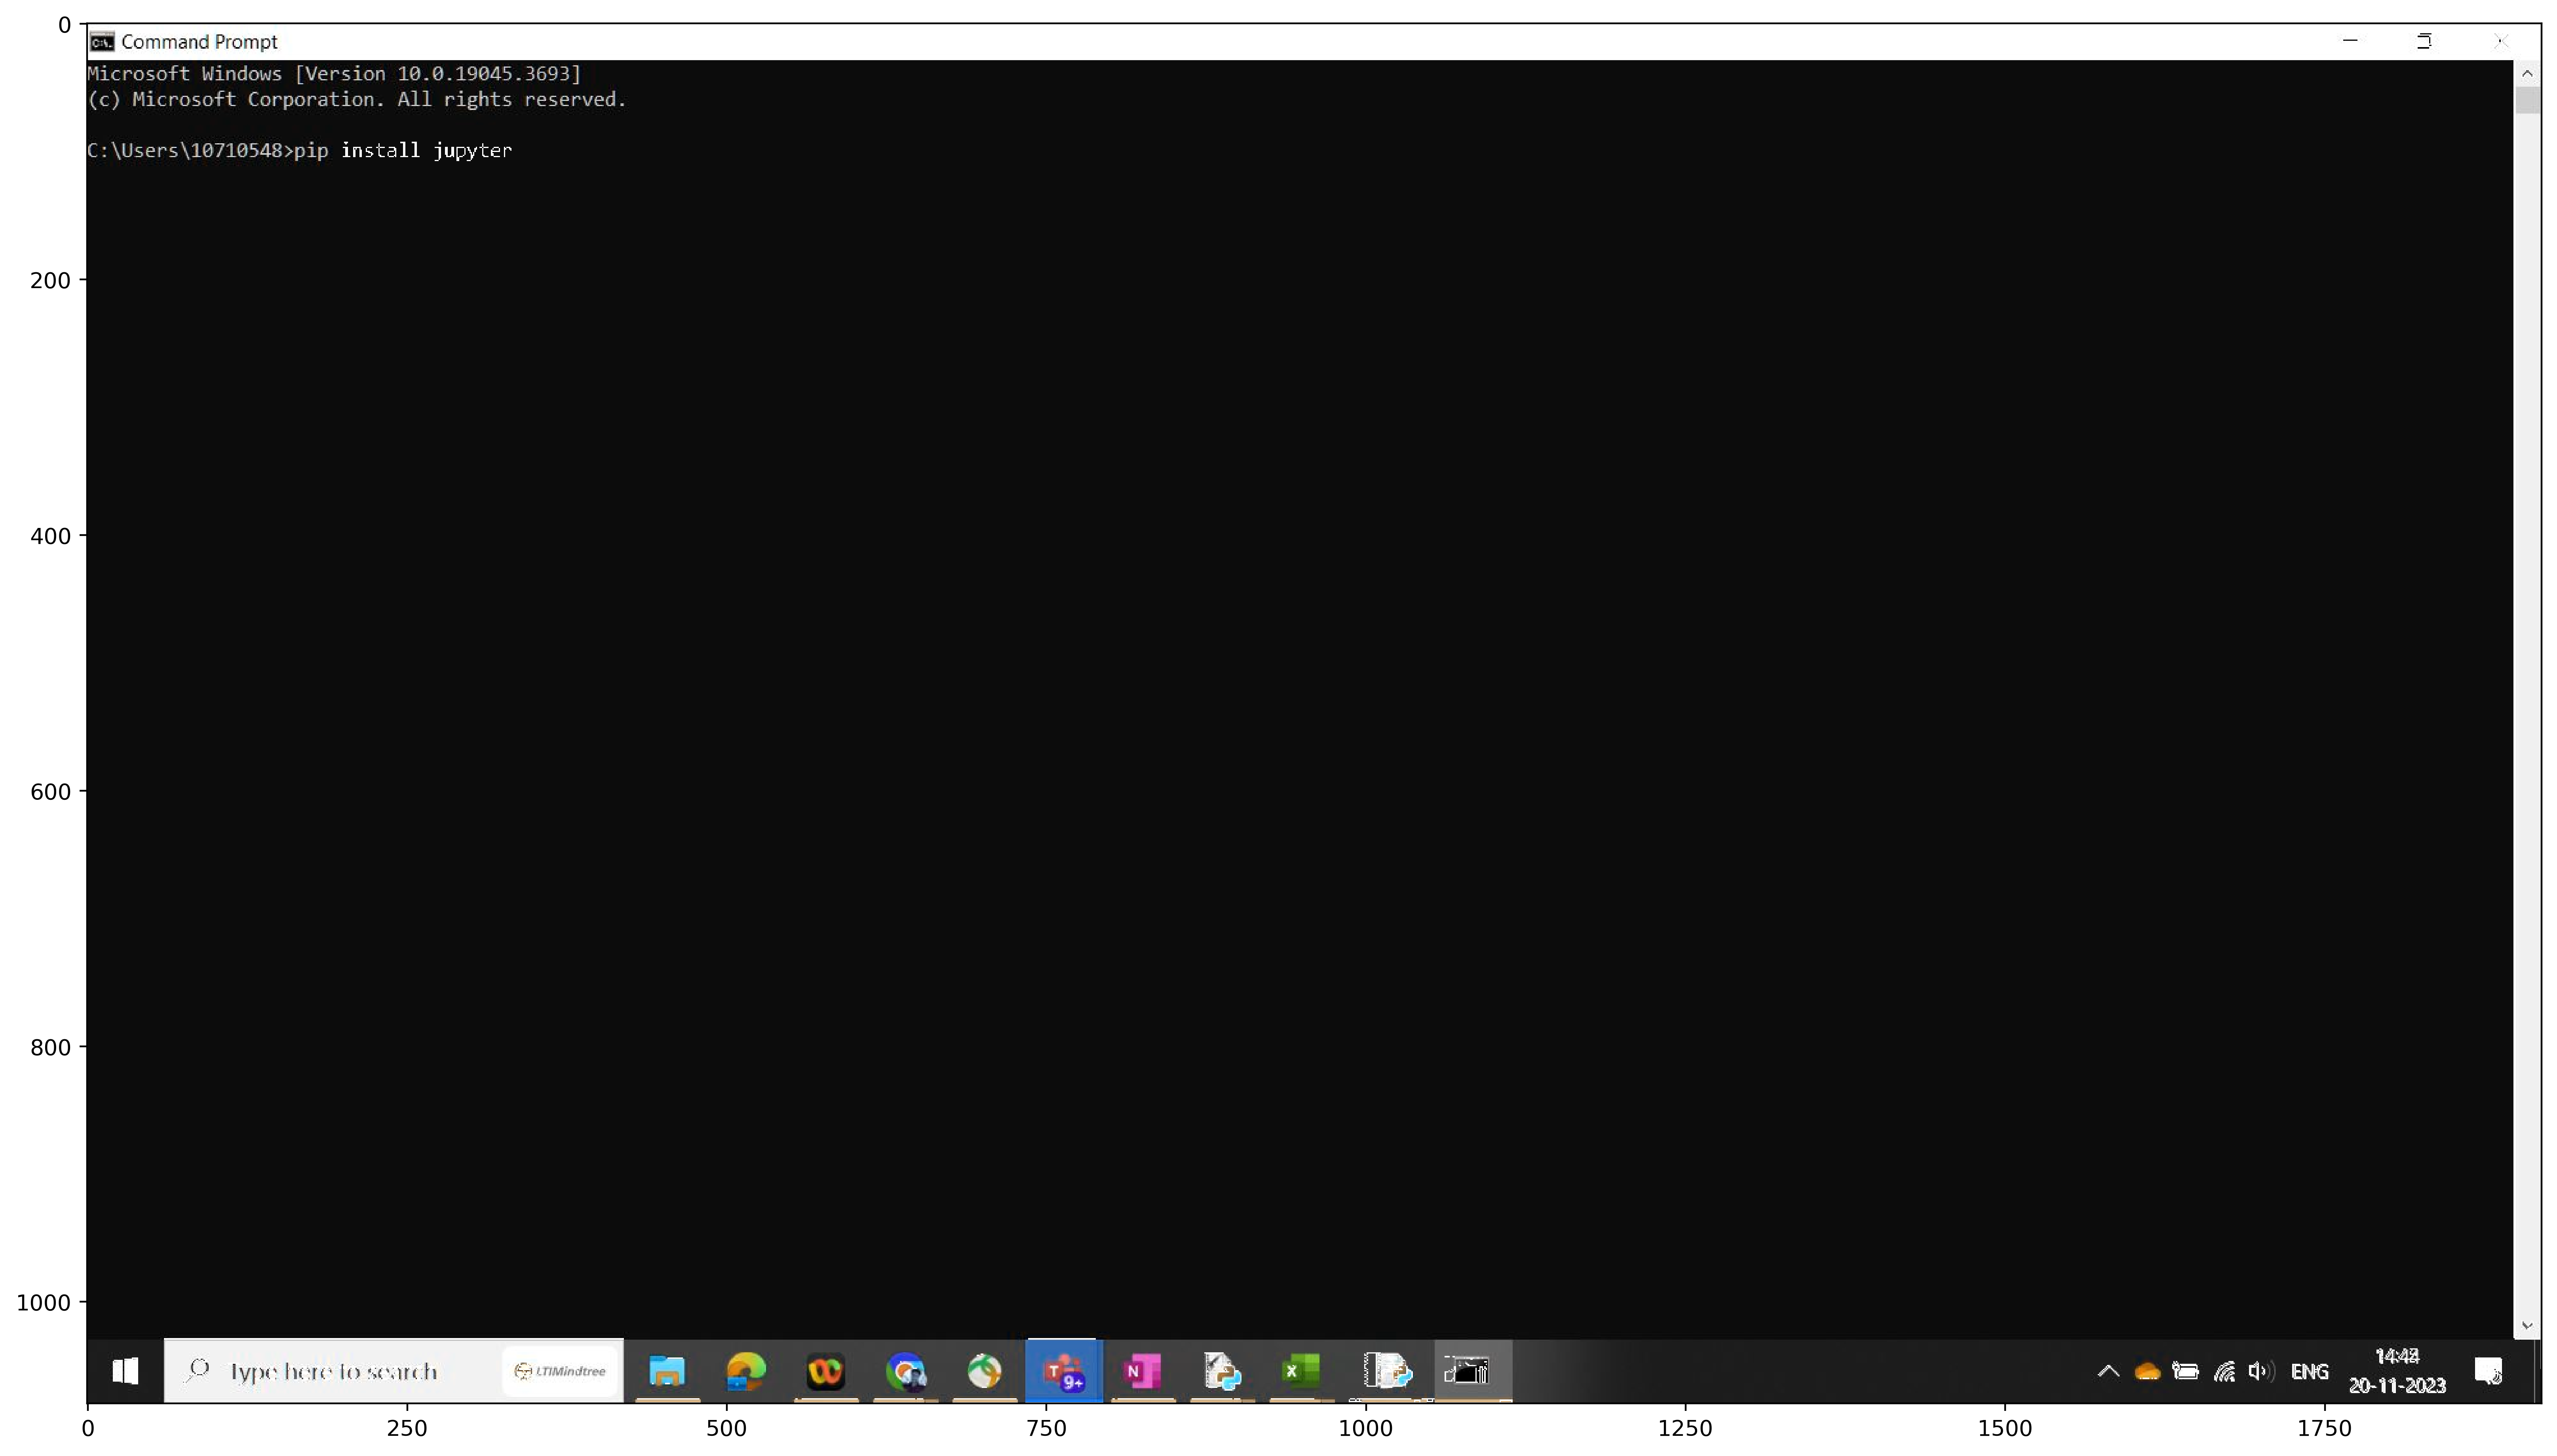

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlap_and_add(frame1, frame2):
    frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))
    # Convert frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    #--- take the absolute difference of the images ---
    diff = cv2.absdiff(gray1, gray2)
    
    """
    below code for calculating absolute differnece
    """

#     res = cv2.absdiff(img1, img2)

    #--- convert the result to integer type ---
    res = diff.astype(np.uint8)

    #--- find percentage difference based on number of pixels that are not zero ---
    percentage = (np.count_nonzero(res) * 100)/ res.size
    
    print(percentage)

    # Threshold the difference to get a binary mask
    _, thresholded = cv2.threshold(diff, 100, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the region of interest (ROI) from frame2
    roi = frame2.copy()
    cv2.drawContours(roi, contours, -1, (0, 0, 255), 2)

    # Append the ROI to the existing frame
#     result = np.concatenate((frame1, roi), axis=0)
    mask = np.zeros_like(frame1)

    # Draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255))#,thickness=cv2.FILLED)

    # Combine the frames using the mask
    result_frame = cv2.addWeighted(frame1, 1, mask, 1.0, 0)

    return result_frame

# Example frames
frame1 = cv2.imread('sample_image_cmd.JPG')
frame2 = cv2.imread('sample_image_cmd1.JPG')

# Overlap frames and append new content
result_frame = overlap_and_add(frame1, frame2)

# Display the result
plt.figure(figsize=(20,20),dpi=400)
plt.imshow(result_frame)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('saved_image.jpg',result_frame)

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def overlap_and_append(frame1, frame2):
#     frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))
#     # Convert frames to grayscale
#     gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
#     gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

#     #--- take the absolute difference of the images ---
#     diff = cv2.absdiff(gray1, gray2)
    
#     """
#     below code for calculating absolute differnece
#     """

# #     res = cv2.absdiff(img1, img2)

#     #--- convert the result to integer type ---
#     res = diff.astype(np.uint8)

#     #--- find percentage difference based on number of pixels that are not zero ---
#     percentage = (np.count_nonzero(res) * 100)/ res.size
    
#     print(percentage)

#     # Threshold the difference to get a binary mask
#     _, thresholded = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

#     # Find contours in the thresholded image
#     contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Extract the region of interest (ROI) from frame2
#     roi = frame2.copy()
#     cv2.drawContours(roi, contours, -1, (0, 0, 255), 2)

#     # Append the ROI to the existing frame
# #     result = np.concatenate((frame1, roi), axis=0)
#     mask = np.zeros_like(frame1)

#     # Draw the contours on the mask
#     cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

#     # Combine the frames using the mask
#     result_frame = cv2.addWeighted(frame1, 1, mask, 0.5, 0)

#     return result_frame

# # Example frames
# frame1 = cv2.imread('sample_image_cmd.JPG')
# frame2 = cv2.imread('sample_image_cmd1.JPG')

# # Overlap frames and append new content
# result_frame = overlap_and_append(frame1, frame2)

# # Display the result
# plt.figure(figsize=(10,10),dpi=400)
# plt.imshow(result_frame)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()
# cv2.imwrite('saved_image.jpg',result_frame)